# Martensite-Start Modeling
This model predicts the martensite-start temperature, $M_s$, of steels by calculating the driving force required for the transformation based on experimental data from a wide variety of binary, ternary, and multicomponent steels. This model was developed by Matt Frichtl [1], using the method developed by Olson [2]; Borgenstamm & Hillert; [3], and Stormvinter, Borgenstam and Agren [4].

References:
[1] : In process 

[2] : G. Ghosh and G. B. Olson, “Computational thermodynamics and the kinetics of martensitic transformation,” Journal of Phase Equilibria, vol. 22, no. 3, pp. 199–207, May 2001, doi: 10.1361/105497101770338653.

[3] : A. Borgenstam and M. Hillert, “Driving force for f.c.c. → b.c.c. martensites in Fe-X alloys,” Acta Materialia, vol. 45, no. 5, pp. 2079–2091, May 1997, doi: 10.1016/s1359-6454(96)00308-4.

[4] : A. Stormvinter, A. Borgenstam, and J. Ågren, “Thermodynamically Based Prediction of the Martensite Start Temperature for Commercial Steels,” Metallurgical and Materials Transactions A, vol. 43, no. 10, pp. 3870–3879, Jun. 2012, doi: 10.1007/s11661-012-1171-z

The first step is determining what type of martensite you are interested in, which is determined by the alloy's composition and cooling rate. If you're unsure, you're welcome to use my machine-learning model that was trained with the dataset contained in the experimental_data subfolder. You will need to define your composition using a dictionary of conditions used by pcalphad.

In [3]:
from libreCalphad.models.martensite_start.martensite_start import predict_martensite_type
import numpy as np
import pycalphad.variables as v

conditions = {v.N: 1, v.P:101325, v.X('C'): 0.02, v.T: (300, 800, 25)}
types, labels, probs = predict_martensite_type(conditions)

# There are four types of decomposition products included in the ML model--alpha, epsilon, lath, and plate.
# Alpha  is used as a classifier for non-martensitic products like bainite or ferrite.
# In this case, all temperatures are predicted to form either lath or plate.
# The highest temperatures may actually form ferrite or bainite, but there's not enough training data for a robust prediction of those.
print(np.arange(300, 800, 25))
print(types)

[300 325 350 375 400 425 450 475 500 525 550 575 600 625 650 675 700 725
 750 775]
['plate' 'plate' 'plate' 'plate' 'plate' 'plate' 'plate' 'plate' 'plate'
 'plate' 'plate' 'lath' 'lath' 'lath' 'lath' 'lath' 'lath' 'lath' 'lath'
 'lath']


In [4]:
# The probabilities array is an n x m matrix, where n is the number of classifiers and m is the number of predictions.
# Labels provides the label for each column of this array for the prediction of each type.
print(labels)
print(probs)

['alpha' 'epsilon' 'lath' 'plate']
[[0.2212639  0.246292   0.26602727 0.26641684]
 [0.21992971 0.24762799 0.26601983 0.26642247]
 [0.21879703 0.24889598 0.26595128 0.26635572]
 [0.21788598 0.25007844 0.26582094 0.26621465]
 [0.21721275 0.25115952 0.26562892 0.26599881]
 [0.21678911 0.25212533 0.26537621 0.26570935]
 [0.21662204 0.25296433 0.26506459 0.26534904]
 [0.21671355 0.25366755 0.26469668 0.26492221]
 [0.21706057 0.25422885 0.26427589 0.26443468]
 [0.21765508 0.25464499 0.2638064  0.26389353]
 [0.21848435 0.25491571 0.26329311 0.26330683]
 [0.21953131 0.25504369 0.26274159 0.2626834 ]
 [0.22077509 0.25503443 0.26215799 0.26203249]
 [0.22219161 0.25489603 0.26154897 0.26136339]
 [0.22375436 0.25463889 0.26092151 0.26068524]
 [0.22543509 0.25427539 0.26028283 0.26000668]
 [0.22720468 0.25381944 0.25964019 0.25933569]
 [0.22903383 0.25328606 0.25900072 0.25867939]
 [0.23089391 0.2526909  0.25837123 0.25804395]
 [0.23275752 0.25204983 0.25775809 0.25743457]]


Text(0, 0.5, 'Probability')

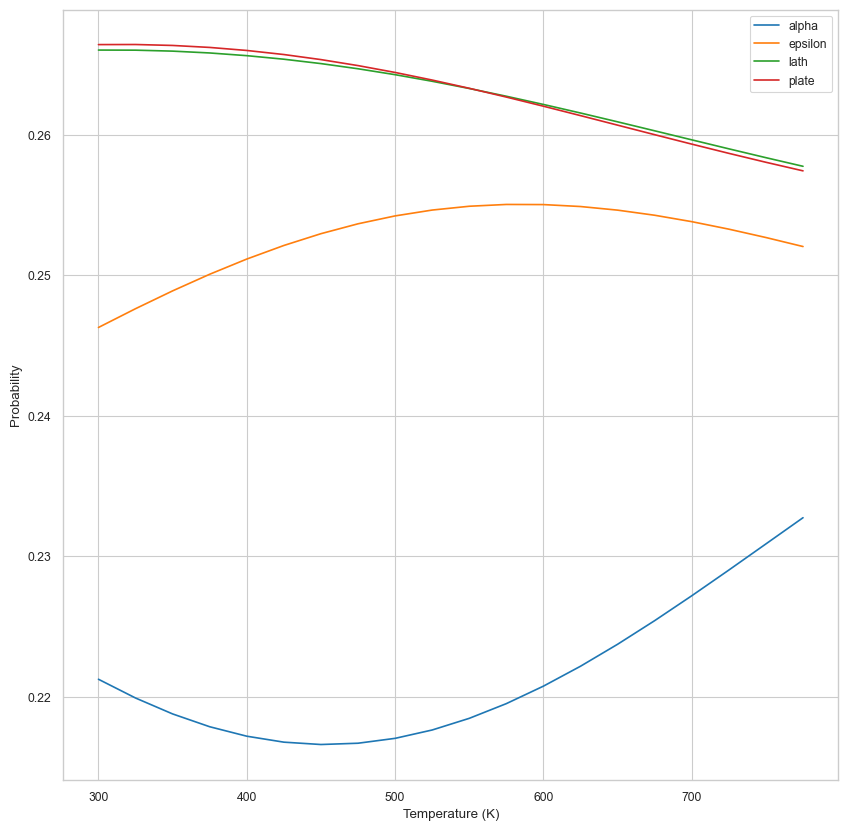

In [5]:
import matplotlib.pyplot as plt

# You can plot all of the probabilities to clearly see what type of decomposition product is predicted to form
# The alpha and epsilon curves are both below lath and plate. Meaning lath and plate are predicted to form.
# You can see the temperature at which the predicted type changes by looking for the intersection.

temps = np.arange(conditions[v.T][0], conditions[v.T][1], conditions[v.T][2])
alpha_probs = [row[0] for row in probs]
eps_probs = [row[1] for row in probs]
lath_probs = [row[2] for row in probs]
plate_probs = [row[3] for row in probs]

fig,ax = plt.subplots(figsize=(10,10))
ax.plot(temps, alpha_probs, label='alpha')
ax.plot(temps, eps_probs, label='epsilon')
ax.plot(temps, lath_probs, label='lath')
ax.plot(temps, plate_probs, label='plate')
ax.legend()
ax.set_xlabel("Temperature (K)")
ax.set_ylabel("Probability")

Text(0, 0.5, 'Probability')

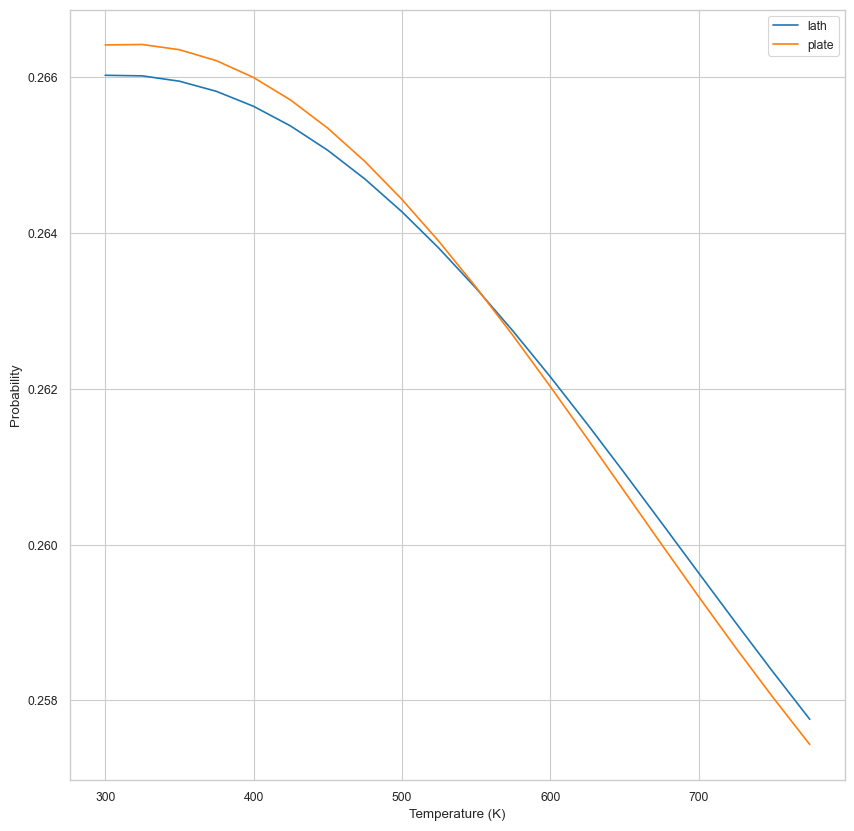

In [6]:
# Plotting only lath and plate gives a better view of those two curves.
# Qualitatively it occurs a little above 550 K. The changing ratio between these curves can be interpreted as probability

temps = np.arange(conditions[v.T][0], conditions[v.T][1], conditions[v.T][2])
alpha_probs = [row[0] for row in probs]
eps_probs = [row[1] for row in probs]
lath_probs = [row[2] for row in probs]
plate_probs = [row[3] for row in probs]

fig,ax = plt.subplots(figsize=(10,10))
ax.plot(temps, lath_probs, label='lath')
ax.plot(temps, plate_probs, label='plate')
ax.legend()
ax.set_xlabel("Temperature (K)")
ax.set_ylabel("Probability")

In [4]:
# Now if you want to predict the actual martensite start temperature for each type of a given composition
from libreCalphad.databases.db_utils import load_database
from libreCalphad.models.martensite_start.martensite_start import get_epsilon_model_mf, get_lath_model_mf, get_plate_model_mf, get_martensite_start
import pycalphad.variables as v

db = load_database('mf-steel.tdb')
conditions = {v.N: 1, v.P: 101325, v.X('C'): 0.01, v.T: (300, 800, 25)}  # The T is not actually necessary, but it's ignored
plate_barrier, plate_contrib_dict = get_plate_model_mf(conditions)
lath_barrier, lath_contrib_dict = get_lath_model_mf(conditions)
eps_barrier, eps_contrib_dict = get_epsilon_model_mf(conditions)
print(f"Lath energy barrier: {lath_barrier} J/mol")
print(f"Plate energy barrier: {plate_barrier} J/mol")
print(f"Epsilon energy barrier {eps_barrier} J/mol")

lath_ms = get_martensite_start(lath_barrier, db, conditions, 'lath')
plate_ms = get_martensite_start(plate_barrier, db, conditions, 'plate')
epsilon_ms = get_martensite_start(eps_barrier, db, conditions, 'epsilon')
print(f"Lath Ms: {lath_ms} K")
print(f"Plate Ms: {plate_ms} K")
print(f"Epsilon Ms: {epsilon_ms} K")

Lath energy barrier: 1331.385748801502 J/mol
Plate energy barrier: 2050.6793394316733 J/mol
Epsilon energy barrier 256.580670840838 J/mol
Lath Ms: 741.8807506561279 K
Plate Ms: 640.277099609375 K
Epsilon Ms: 391.9639587402344 K


Completed 0.0
Completed 0.01
Completed 0.02
Completed 0.03
Completed 0.04
Completed 0.05
Completed 0.06
Completed 0.07
Completed 0.08
Completed 0.09


Text(0.5, 1.0, 'Martensite Start Temperature')

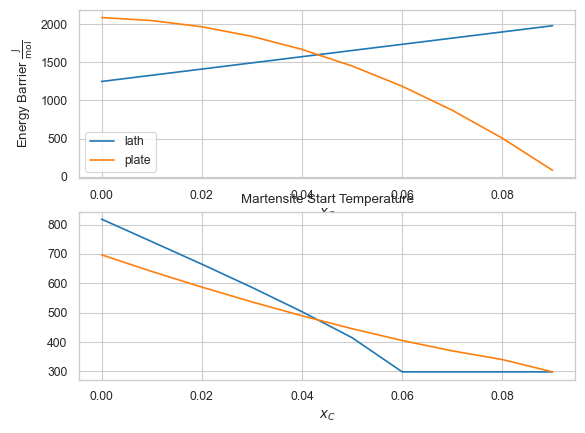

In [3]:
# If you want to plot them over a range of concentrations.
# Note that pycalphad will not extend below the assessment temperature range, so 298.15 K is the minimum temperature.

import matplotlib.pyplot as plt
import numpy as np
from libreCalphad.databases.db_utils import load_database
from libreCalphad.models.martensite_start.martensite_start import get_epsilon_model_mf, get_lath_model_mf, get_plate_model_mf, get_martensite_start
import pycalphad.variables as v

db = load_database('mf-steel.tdb')
c_conc_arr = np.arange(0.0, 0.1, 0.01)
conditions = {v.N: 1, v.P: 101325, v.X('C'): 0.01, v.T: (300, 800, 25)}  # The T is not actually necessary, but it's ignored
lath_barrier_arr = []
lath_ms_arr = []
plate_barrier_arr = []
plate_ms_arr = []
for c_conc in c_conc_arr:
    conditions.update({v.X('C'): c_conc})
    plate_barrier, plate_contrib_dict = get_plate_model_mf(conditions)
    plate_barrier_arr.append(plate_barrier)
    lath_barrier, lath_contrib_dict = get_lath_model_mf(conditions)
    lath_barrier_arr.append(lath_barrier)
    lath_ms = get_martensite_start(lath_barrier, db, conditions, 'lath')
    plate_ms = get_martensite_start(plate_barrier, db, conditions, 'plate')
    lath_ms_arr.append(lath_ms)
    plate_ms_arr.append(plate_ms)
    print(f"Completed {c_conc}")

fig, ax = plt.subplots(nrows=2)
ax[0].plot(c_conc_arr, lath_barrier_arr, label='lath')
ax[0].plot(c_conc_arr, plate_barrier_arr, label='plate')
ax[0].set_xlabel(r'$x_C$')
ax[0].set_ylabel(r'Energy Barrier $\frac{\mathrm{J}}{\mathrm{mol}}$')
ax[0].legend()

ax[1].plot(c_conc_arr, lath_ms_arr, label='lath')
ax[1].plot(c_conc_arr, plate_ms_arr, label='plate')
ax[1].set_xlabel(r'$x_C$')
ax[1].set_title('Martensite Start Temperature')
